In [88]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
#%matplotlib inline
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.12.0
TensorFlow Decision Forests v1.3.0


In [89]:
train_file_path = "../input/house-prices-advanced-regression-techniques/train.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))
dataset_df.head(3)

Full train dataset shape is (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [90]:
dataset_df = dataset_df.drop('Id', axis=1)
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [91]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


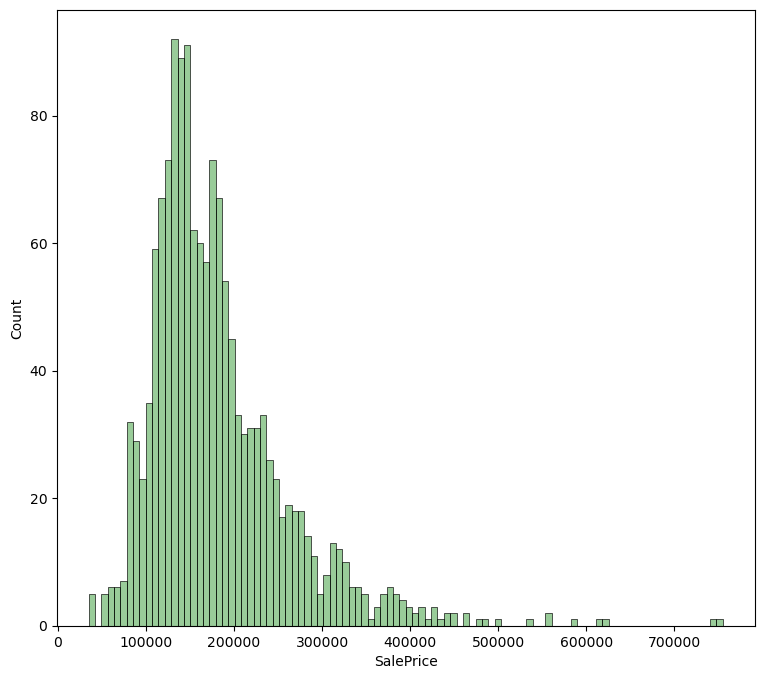

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

print(dataset_df['SalePrice'].describe())

plt.figure(figsize=(9, 8))
sns.histplot(dataset_df['SalePrice'], color='g', bins=100, alpha=0.4)
plt.show()


In [93]:
unique_dtypes = list(set(dt for dt in dataset_df.dtypes))


In [94]:
 (dataset_df.select_dtypes(include = ['float64', 'int64'])).head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


To output multiple subplots, the figure containing the passed axes is being cleared.


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

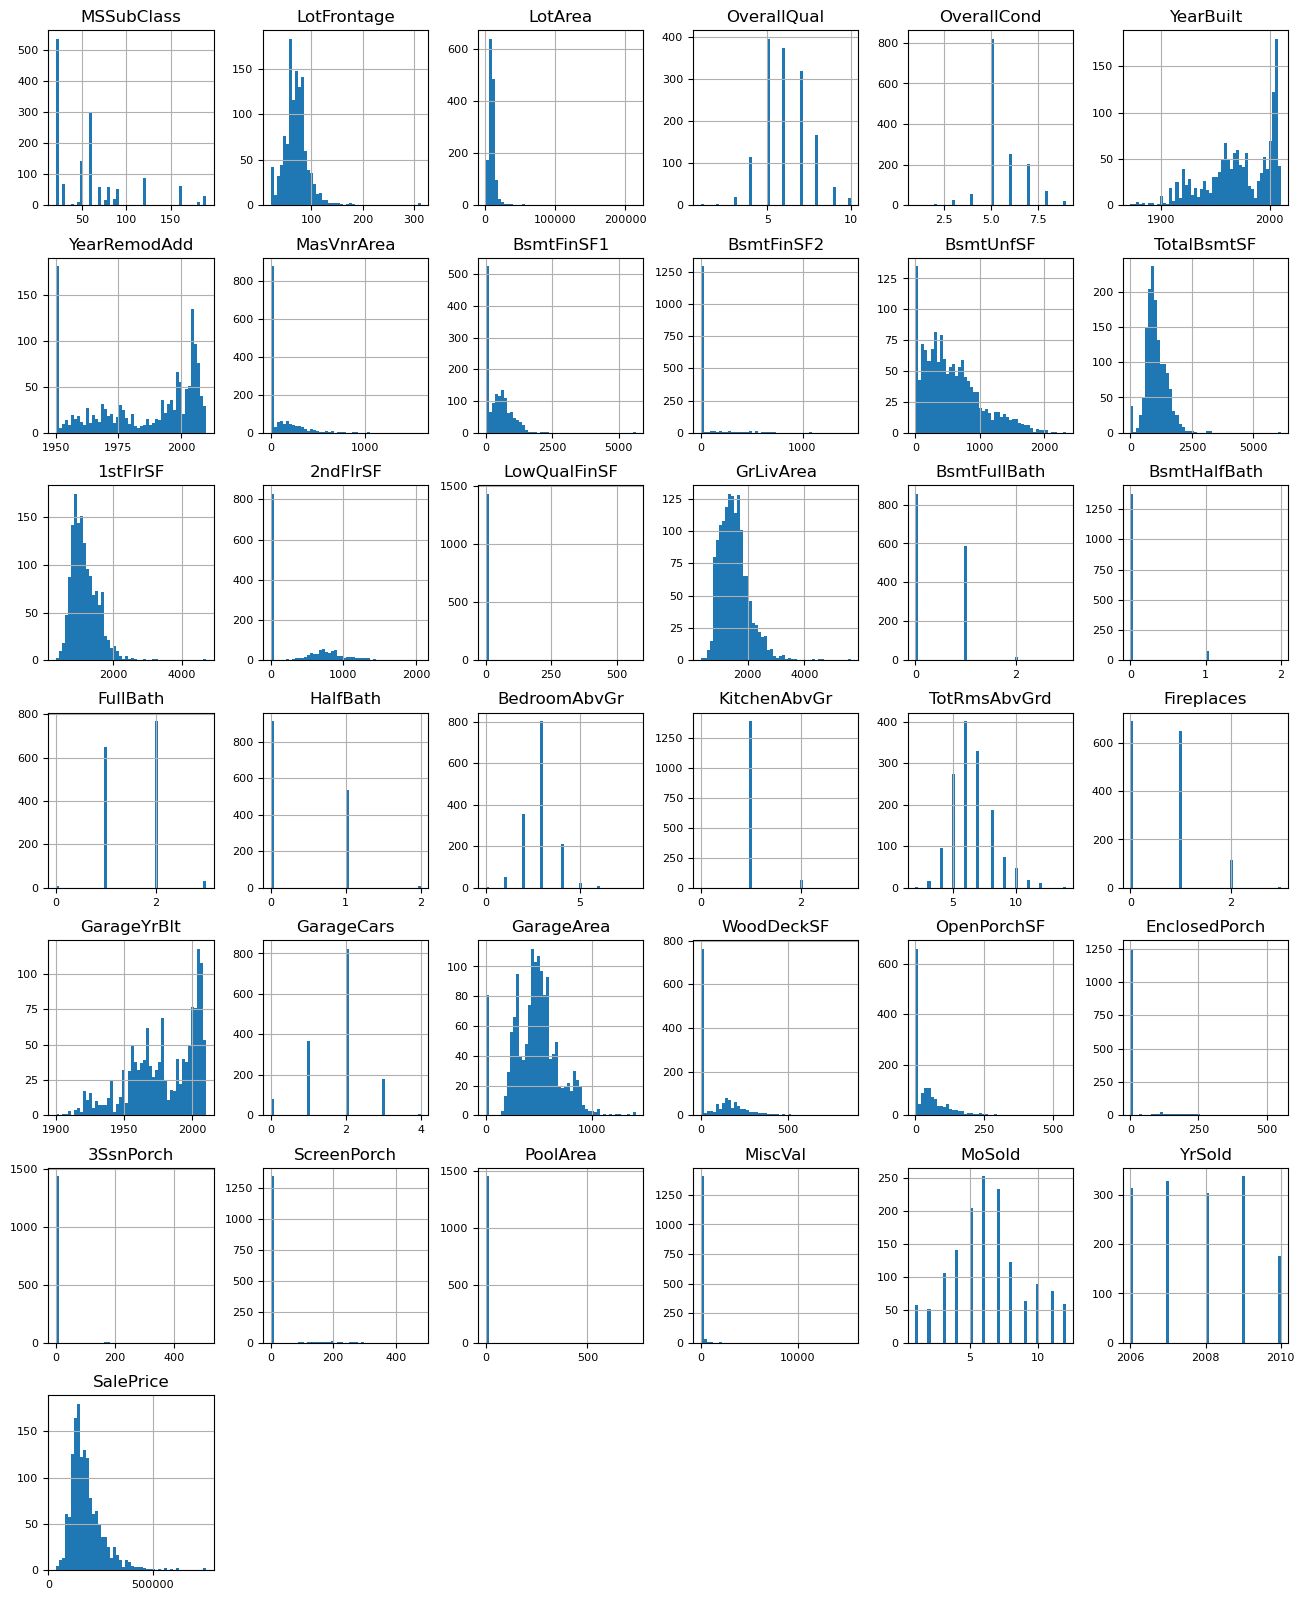

In [95]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(16, 20))
df_num.hist(bins=50, xlabelsize=8, ylabelsize=8, ax=axes)


In [96]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
    np.random.seed(42)
    indices = np.arange(len(dataset))
    np.random.shuffle(indices)
    split_idx = int(len(dataset) * (1 - test_ratio))
    train_indices = indices[:split_idx]
    test_indices = indices[split_idx:]
    return dataset.iloc[train_indices], dataset.iloc[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print(f"{len(train_ds_pd)} examples in training, {len(valid_ds_pd)} examples in testing.")



1021 examples in training, 439 examples in testing.


In [97]:
import tensorflow_decision_forests as tfdf

label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task=tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task=tfdf.keras.Task.REGRESSION)


In [98]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [99]:
import tensorflow_decision_forests as tfdf

task = tfdf.keras.Task.REGRESSION
rf = tfdf.keras.RandomForestModel(task=task)
rf.compile(metrics=["mse"])
rf.fit(x=train_ds)


Use /tmp/tmpbez8es_a as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.861098. Found 1021 examples.
Training model...
Model trained in 0:00:01.478416
Compiling model...


[INFO 23-07-05 06:19:58.6821 UTC kernel.cc:1242] Loading model from path /tmp/tmpbez8es_a/model/ with prefix be14843e512e453d
[INFO 23-07-05 06:19:58.8586 UTC decision_forest.cc:660] Model loaded with 300 root(s), 97024 node(s), and 74 input feature(s).
[INFO 23-07-05 06:19:58.8586 UTC abstract_model.cc:1311] Engine "RandomForestOptPred" built
[INFO 23-07-05 06:19:58.8587 UTC kernel.cc:1074] Use fast generic engine


Model compiled.


AttributeError: 'RandomForestModel' object has no attribute 'models'

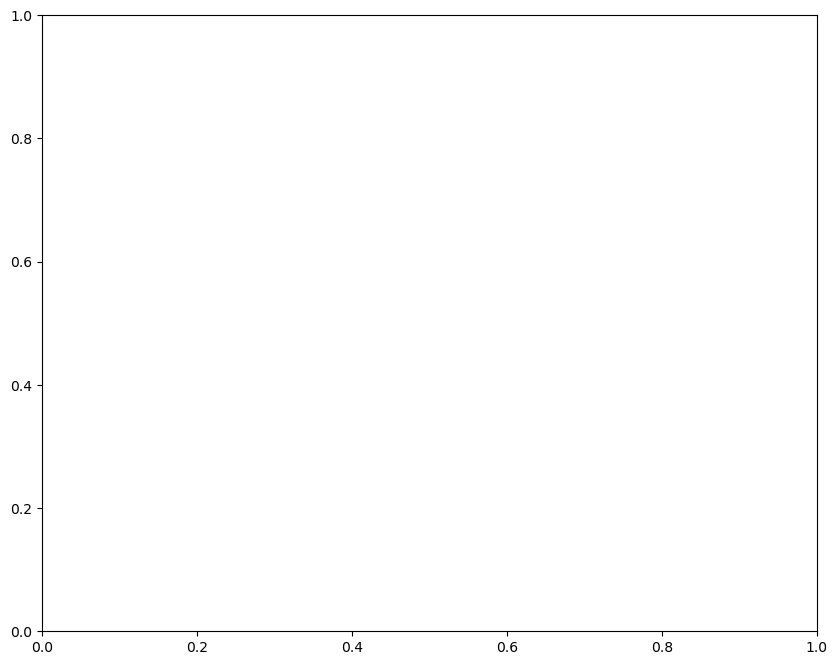

In [100]:
import tensorflow_decision_forests as tfdf
from matplotlib import pyplot as plt

def custom_plot_model(model, tree_index, max_depth):
    fig, ax = plt.subplots(figsize=(10, 8))
    # Plot the decision tree
    decision_tree = rf.models[0].trees[0]
    plt.figure(figsize=(10, 8))
    plot_tree(decision_tree, max_depth=3, filled=True, feature_names=train_ds_pd.columns[:-1])
    plt.show()
    # Replace "model" with your model object and set "tree_index" and "max_depth" as desired
    # Add your custom code here to plot the decision tree using matplotlib or any other library

# Call the custom plot function
custom_plot_model(rf, tree_index=0, max_depth=3)


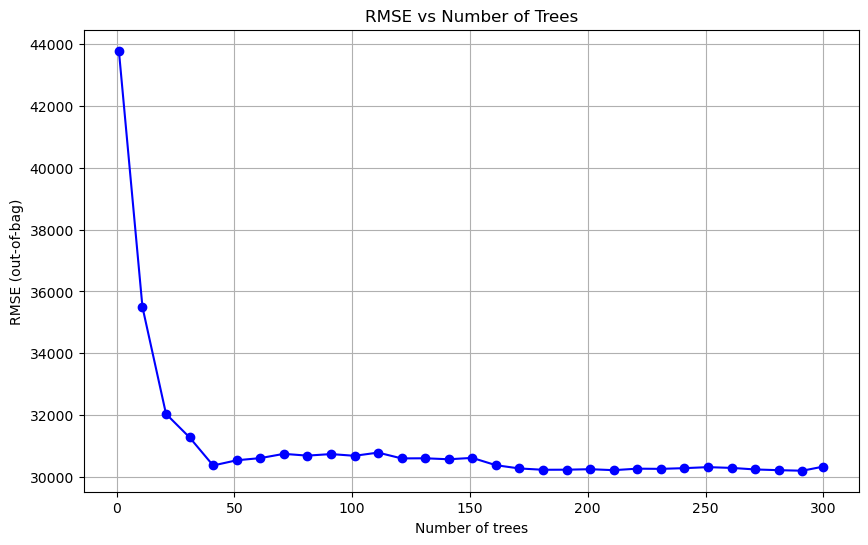

In [103]:
import matplotlib.pyplot as plt

logs = rf.make_inspector().training_logs()

num_trees = [log.num_trees for log in logs]
rmse_values = [log.evaluation.rmse for log in logs]

plt.figure(figsize=(10, 6))
plt.plot(num_trees, rmse_values, marker='o', linestyle='-', color='b')
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.title("RMSE vs Number of Trees")
plt.grid(True)
plt.show()


In [ ]:
evaluation = rf.evaluate(valid_ds, return_dict=True)

for name, value in evaluation.items():
    print("{}: {:.4f}".format(name, value))




In [ ]:
importances = inspector.variable_importances()

print("Available variable importances:")
for importance in importances.keys():
    print("\t{}".format(importance))


In [ ]:
inspector.variable_importances()["NUM_AS_ROOT"]

In [ ]:
import numpy as np

fig, ax = plt.subplots(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
importance_metric = "NUM_AS_ROOT"
importance_tuples = inspector.variable_importances()[importance_metric]

# Extract the feature names and importance values.
feature_names = [t[0].name for t in importance_tuples]
feature_importances = [t[1] for t in importance_tuples]
feature_ranks = np.arange(len(feature_names))

bar = ax.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
ax.set_yticks(feature_ranks)
ax.set_yticklabels(feature_names)
ax.invert_yaxis()

# Label each bar with importance values
for importance, patch in zip(feature_importances, bar.patches):
    ax.text(patch.get_x() + patch.get_width(), patch.get_y(), "{:.4f}".format(importance), va="top")

ax.set_xlabel(importance_metric)
ax.set_title("Importance of {} for class 1 vs others".format(importance_metric))
plt.tight_layout()
plt.show()


In [102]:
test_file_path = "../input/house-prices-advanced-regression-techniques/test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task=tfdf.keras.Task.REGRESSION)

predictions = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': predictions.squeeze()})

output.head()


2/2 [==============================] - 0s 26ms/step


,Id,SalePrice
0,1461,128489.054688
1,1462,153215.484375
2,1463,179641.828125
3,1464,183316.671875
4,1465,194049.484375


In [101]:
sample_submission_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission_df['SalePrice'] = rf.predict(test_ds)
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head()


2/2 [==============================] - 1s 23ms/step


,Id,SalePrice
0,1461,128489.054688
1,1462,153215.484375
2,1463,179641.828125
3,1464,183316.671875
4,1465,194049.484375
